## Credit Card Fraud Detection

### Problem Statement

In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for the banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions 

Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import datetime

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

pd.set_option('display.max_rows', 500)
pd.options.display.max_rows = 100

### Reading Data

In [2]:
df_train=pd.read_csv(r"F:\Ketan\Projects\CC_fraud\fraudTrain.csv")
df_test=pd.read_csv(r"F:\Ketan\Projects\CC_fraud\fraudTest.csv")

In [3]:
df_train.shape,df_test.shape

((1296675, 23), (555719, 23))

In [4]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

##### No Null values present

In [8]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [11]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [12]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

##### No Null values present

### Data Preparation

#### Combining both the dataset for data preparation

In [13]:
data = pd.concat([df_train, df_test]) # Forming a consolidated dataset

In [14]:
# dropping unnecessary columns
data=data.drop(['Unnamed: 0','cc_num','trans_num','zip','unix_time','street'], axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   merchant               object 
 2   category               object 
 3   amt                    float64
 4   first                  object 
 5   last                   object 
 6   gender                 object 
 7   city                   object 
 8   state                  object 
 9   lat                    float64
 10  long                   float64
 11  city_pop               int64  
 12  job                    object 
 13  dob                    object 
 14  merch_lat              float64
 15  merch_long             float64
 16  is_fraud               int64  
dtypes: float64(5), int64(2), object(10)
memory usage: 254.4+ MB


In [16]:
# Extratcing year, month, day and hour from transaction date and time column

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['year']=data['trans_date_trans_time'].dt.year
data['month']=data['trans_date_trans_time'].dt.month_name(locale = 'English')
data['day']=data['trans_date_trans_time'].dt.day_name()
data['hour']=data['trans_date_trans_time'].dt.hour

In [17]:
# Calculating age from 'dob' column

data['dob']=pd.to_datetime(data['dob'])
data['current_year']=datetime.date.today().year
data['age']=data['current_year'] - data['dob'].dt.year
data.drop(['current_year','dob'], axis=1, inplace=True)

In [18]:
# Calculating distance between customer and merchants

import geopy.distance

coords=list(zip(data['lat'],data['long'],data['merch_lat'],data['merch_long']))
data['coords']=coords
data['distance_km']=data['coords'].apply(lambda x: round(geopy.distance.geodesic((x[0],x[1]),(x[2],x[3])).km))
data.drop('coords', axis=1, inplace=True)

#### Dropping unwanted columns

In [19]:
data.drop(['trans_date_trans_time','first','last','lat','long','merch_lat','merch_long','merchant','job','city'], axis=1 ,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   category     object 
 1   amt          float64
 2   gender       object 
 3   state        object 
 4   city_pop     int64  
 5   is_fraud     int64  
 6   year         int64  
 7   month        object 
 8   day          object 
 9   hour         int64  
 10  age          int64  
 11  distance_km  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 183.7+ MB


### Univariate Analysis

In [21]:
def univariate_cat(df,col):
    font_dict={'fontsize': 13, 'fontweight' : 2, 'color' : 'Black'}
    if col=='state':
        plt.figure(figsize=(15,8))
    else:
        plt.figure(figsize=(10,4))
    for i in range(1,3):
        if col=='state':
            plt.subplot(2,1,i)
        else:
            plt.subplot(1,2,i)
        if i==1:
            sns.countplot(data=df, x=col)
            plt.title('Countplot - '+col.title()+' variable', fontdict=font_dict)
        else:
            sns.countplot(data=df[df['is_fraud']==1], x=col)
            plt.title('Countplot - '+col.title()+' variable with fraud class', fontdict=font_dict)
        plt.xticks(rotation=45)
    plt.show()

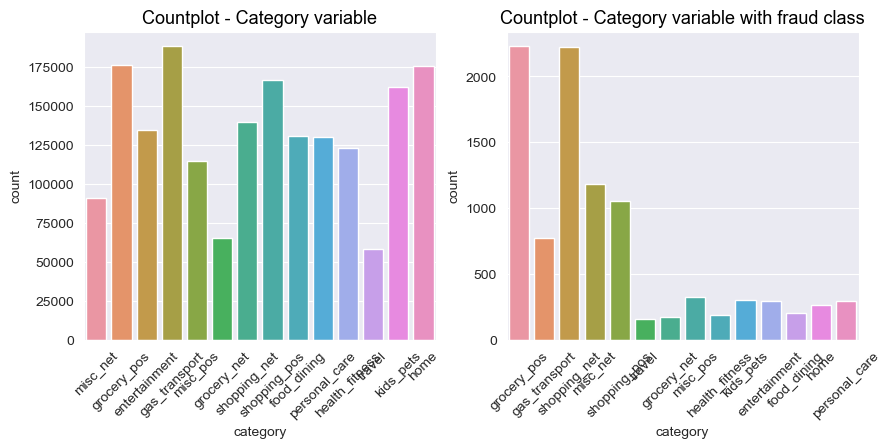

In [22]:
univariate_cat(data,'category')

##### Even if gas_transport category has higher transactions, grocery_pos and shopping_net category contributes to many fraud transaction

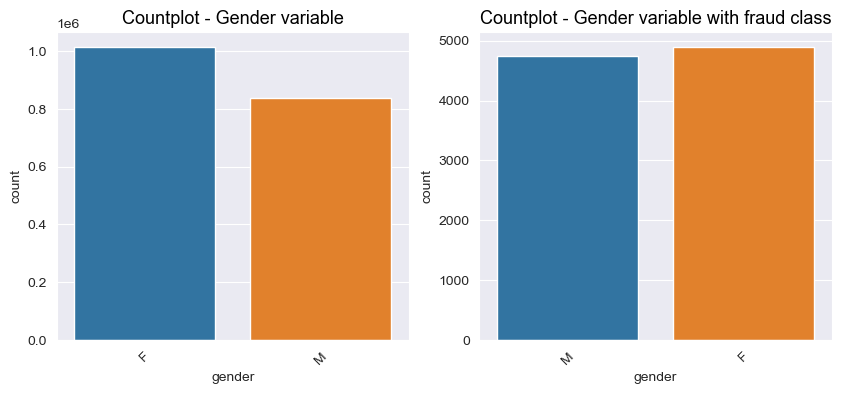

In [23]:
univariate_cat(data,'gender')

##### Compared to males, females perform more transactions, and fraudulent transaction are also done more by females

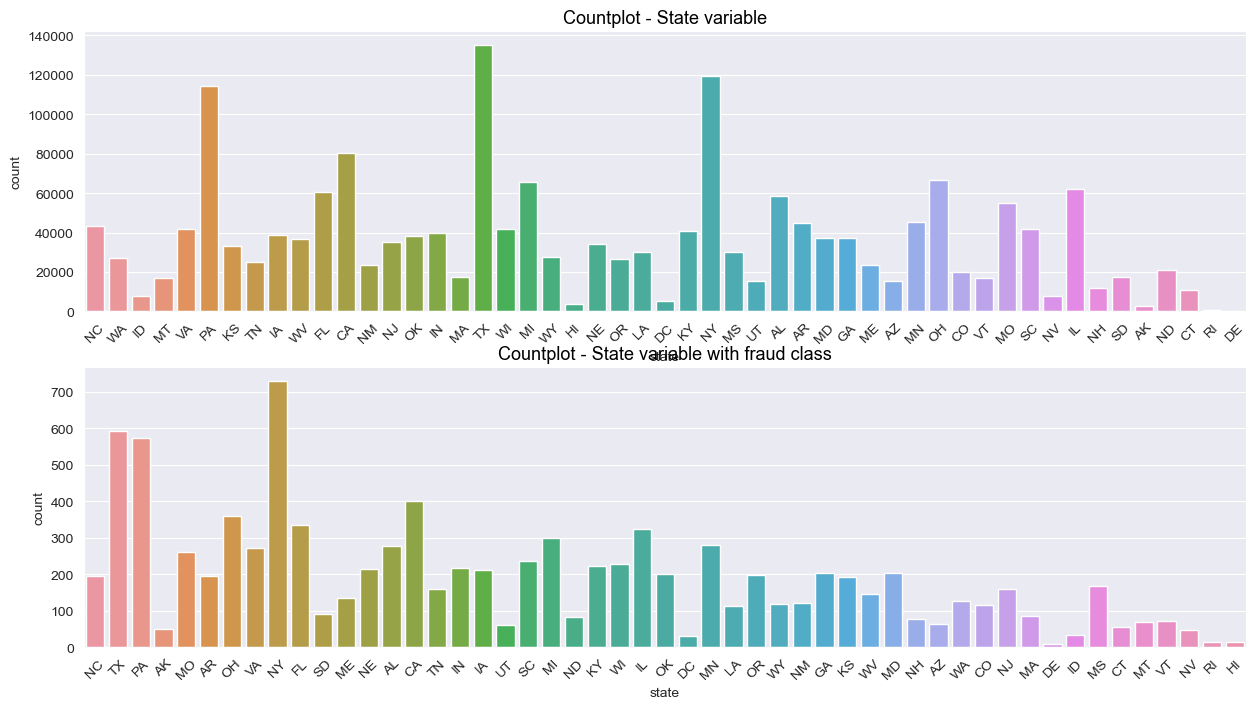

In [24]:
univariate_cat(data,'state')

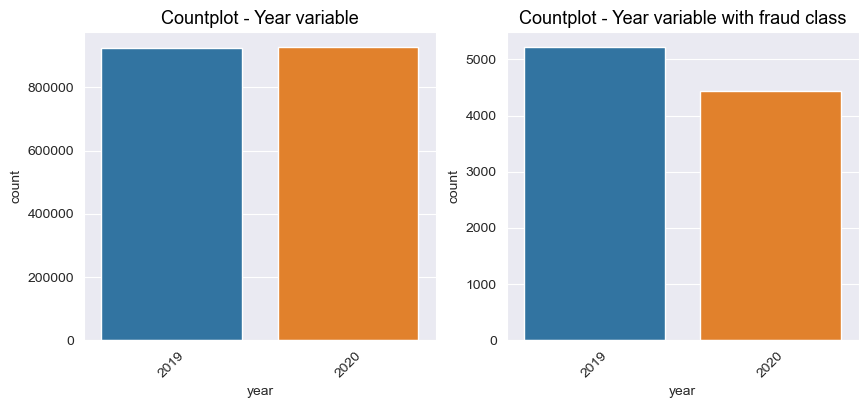

In [25]:
univariate_cat(data,'year')

### Bivariate Analysis

#### Numerical - Numerical

In [26]:
font_dict={'fontsize': 13, 'fontweight' : 2, 'color' : 'Black'}

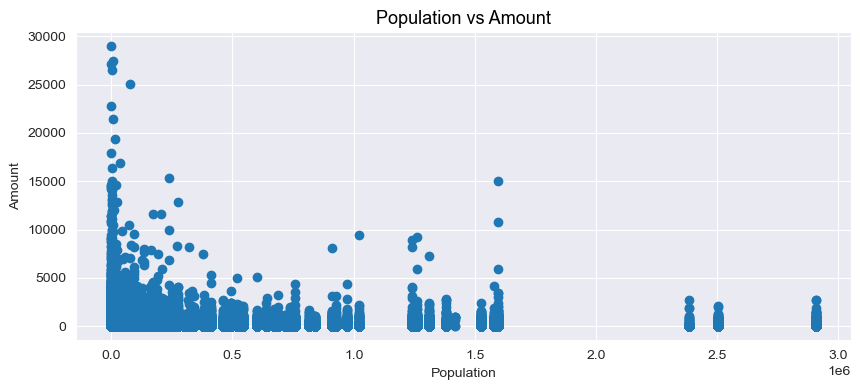

In [27]:
plt.figure(figsize=(10,4))
plt.scatter(data=data, x='city_pop', y='amt')
plt.title('Population vs Amount', fontdict=font_dict)
plt.xlabel('Population')
plt.ylabel('Amount', rotation=90)
plt.show()

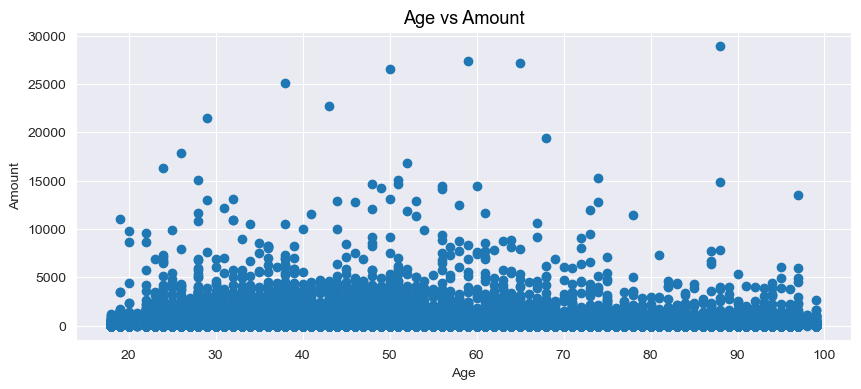

In [28]:
plt.figure(figsize=(10,4))
plt.scatter(data=data, x='age', y='amt')
plt.title('Age vs Amount', fontdict=font_dict)
plt.xlabel('Age')
plt.ylabel('Amount', rotation=90)
plt.show()

#### Numerical - Categorical

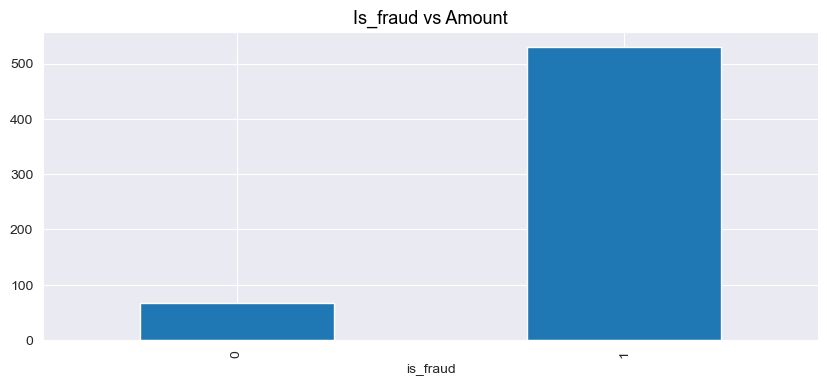

In [29]:
plt.figure(figsize=(10,4))
data.groupby("is_fraud")["amt"].mean().plot.bar()
plt.title('Is_fraud vs Amount', fontdict=font_dict)
plt.show()

##### Average amount of fraudulent transaction is around 500 dollars

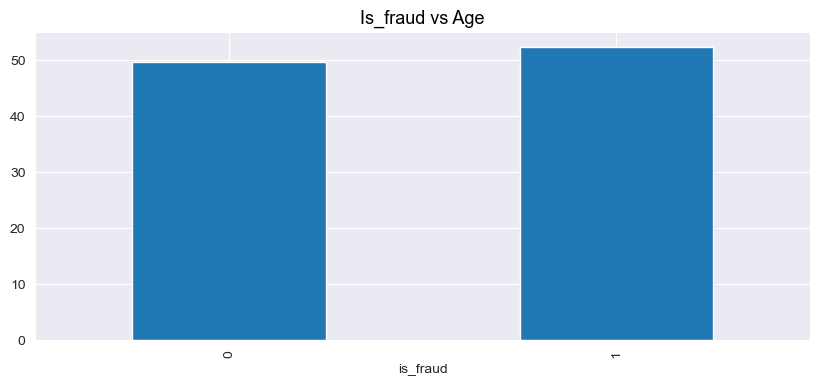

In [30]:
plt.figure(figsize=(10,4))
data.groupby("is_fraud")["age"].mean().plot.bar()
plt.title('Is_fraud vs Age', fontdict=font_dict)
plt.show()

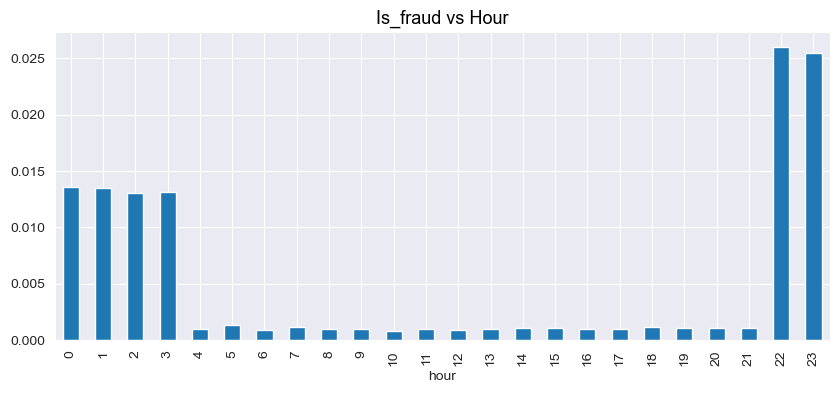

In [31]:
plt.figure(figsize=(10,4))
data.groupby("hour")["is_fraud"].mean().plot.bar()
plt.title('Is_fraud vs Hour', fontdict=font_dict)
plt.show()

##### Major fraudulent transactions are performed at odd hours 

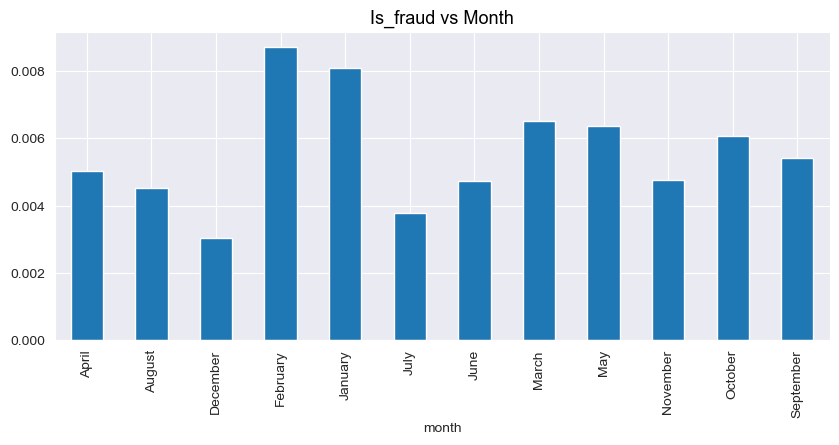

In [32]:
plt.figure(figsize=(10,4))
data.groupby("month")["is_fraud"].mean().plot.bar()
plt.title('Is_fraud vs Month', fontdict=font_dict)
plt.show()

##### Most fraud transactions are done in month of January and February

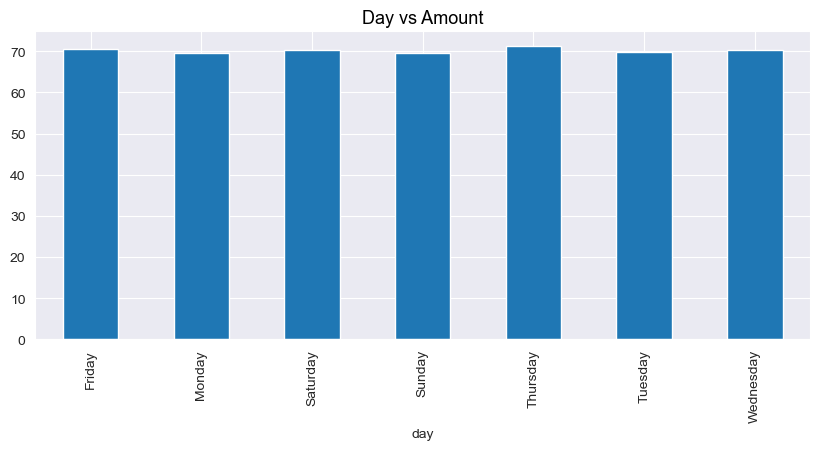

In [33]:
plt.figure(figsize=(10,4))
data.groupby("day")["amt"].mean().plot.bar()
plt.title('Day vs Amount', fontdict=font_dict)
plt.show()

##### Irrespective of the day around 70 dollars is the avergae transaction amount

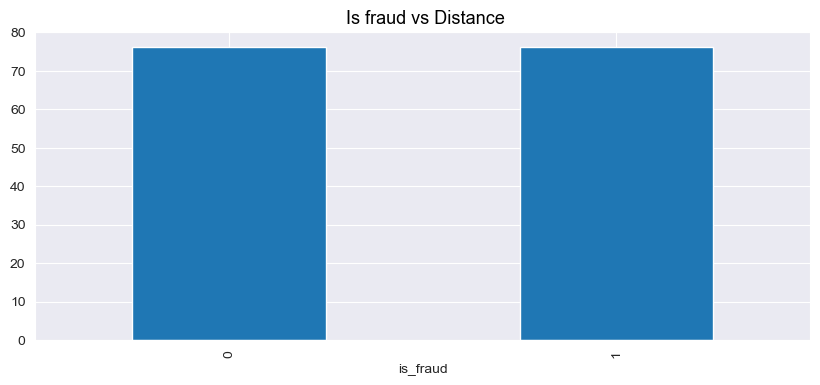

In [34]:
plt.figure(figsize=(10,4))
data.groupby("is_fraud")["distance_km"].mean().plot.bar()
plt.title(' Is fraud vs Distance', fontdict=font_dict)
plt.show()

##### For both fraud and genuine transactions, avergae distance is 70 km

#### Categorical - Categorical

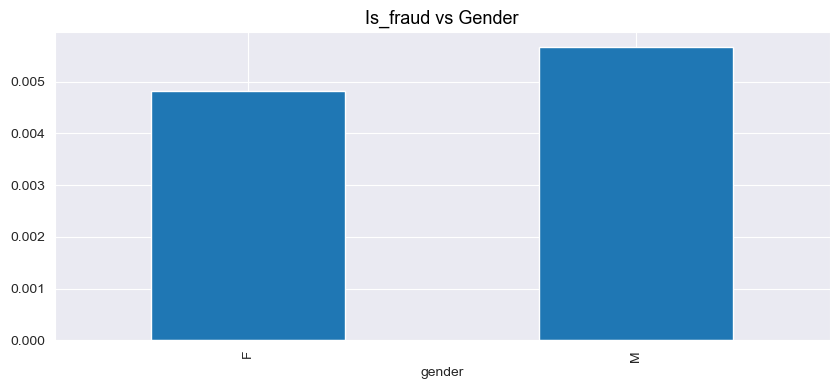

In [35]:
plt.figure(figsize=(10,4))
data.groupby("gender")["is_fraud"].mean().plot.bar()
plt.title('Is_fraud vs Gender', fontdict=font_dict)
plt.show()

##### Males are responsible for most of fraud transactions

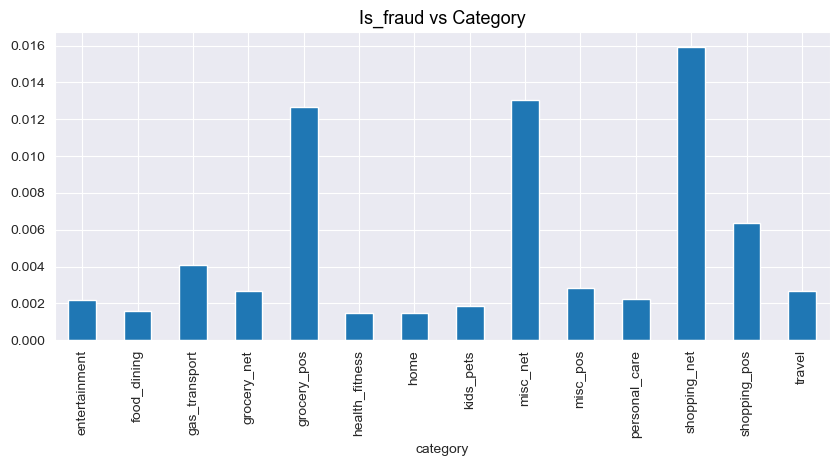

In [36]:
plt.figure(figsize=(10,4))
data.groupby("category")["is_fraud"].mean().plot.bar()
plt.title('Is_fraud vs Category', fontdict=font_dict)
plt.show()

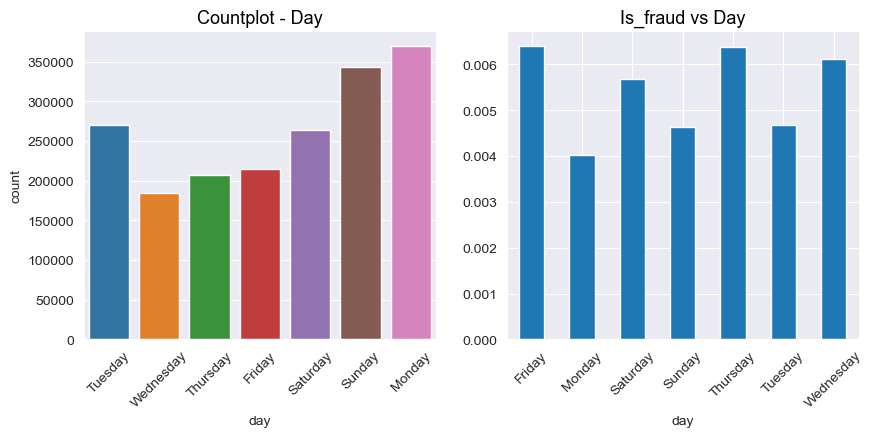

In [37]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x=data['day'])
plt.title('Countplot - Day', fontdict=font_dict)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
data.groupby("day")["is_fraud"].mean().plot.bar()
plt.title('Is_fraud vs Day', fontdict=font_dict)
plt.xticks(rotation=45)
plt.show()

##### Even if less overall transactions are performed on Wednesday, Thursday and Friday still fraud transactions are comparatively high on these days

### Multivariate Analysis

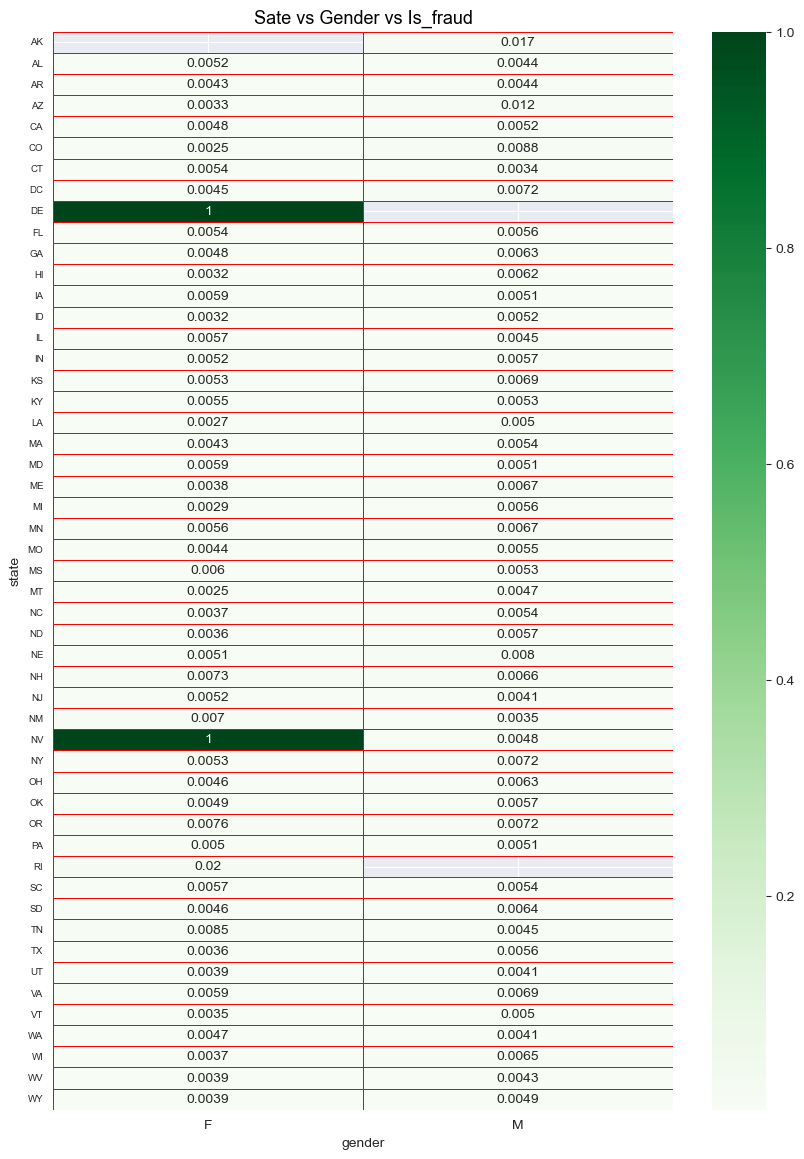

In [38]:
#state v/s gender Type v/s is_fraud
pivot = pd.pivot_table(data=data, index="state", columns="gender", values="is_fraud")
plt.figure(figsize=(10,14))
sns.heatmap(pivot, linewidths=0.5, linecolor='red', cmap='Greens', annot=True)
plt.title('Sate vs Gender vs Is_fraud', fontdict=font_dict)
plt.yticks(fontsize=7)
plt.show()

##### All the transactions done by females in state DE and state NV are fraud

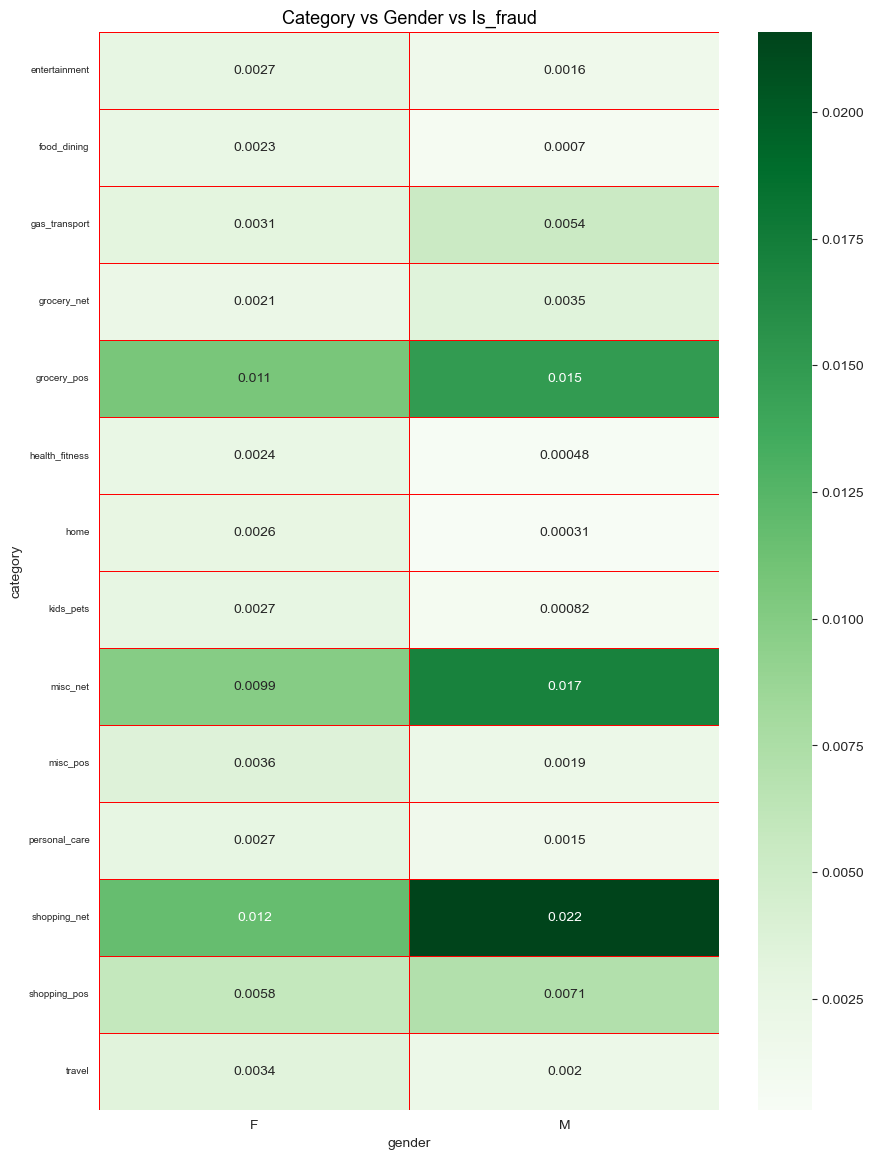

In [39]:
#state v/s gender Type v/s is_fraud
pivot = pd.pivot_table(data=data, index="category", columns="gender", values="is_fraud")
plt.figure(figsize=(10,14))
sns.heatmap(pivot, linewidths=0.5, linecolor='red', cmap='Greens', annot=True)
plt.title('Category vs Gender vs Is_fraud', fontdict=font_dict)
plt.yticks(fontsize=7)
plt.show()

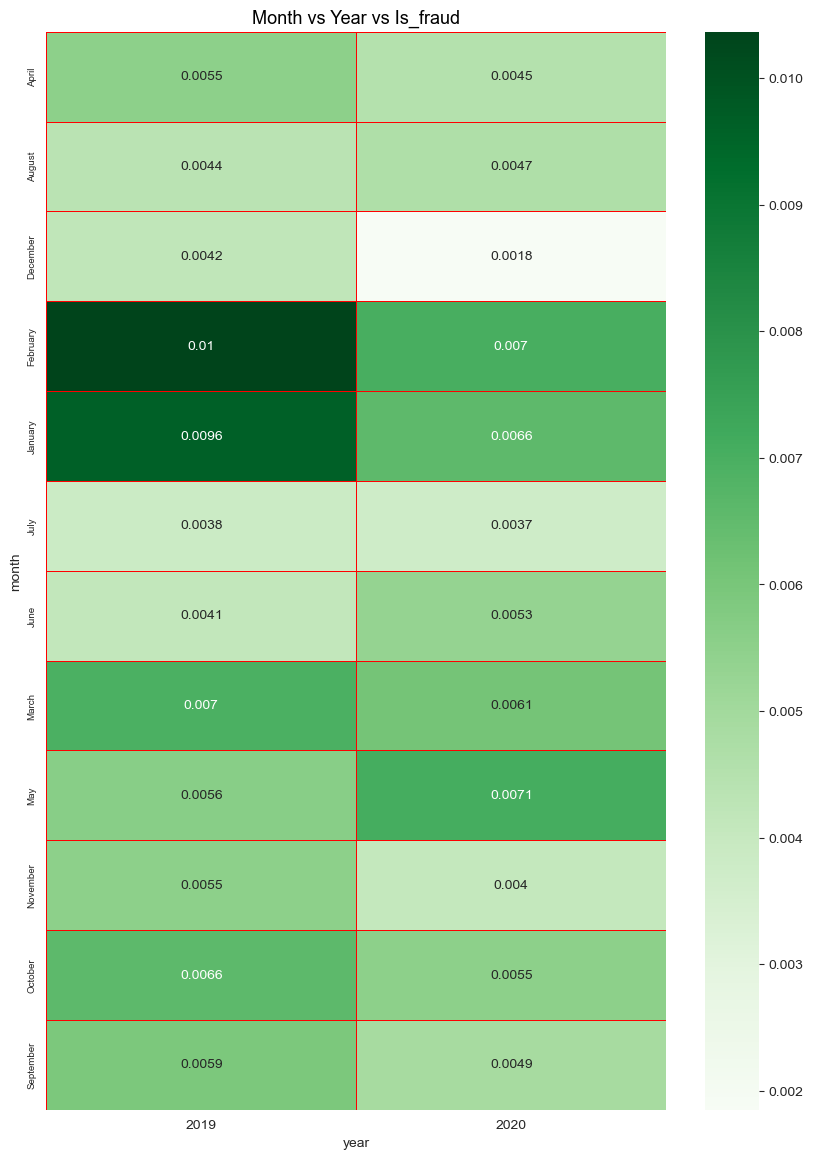

In [40]:
#state v/s gender Type v/s is_fraud
pivot = pd.pivot_table(data=data, index="month", columns="year", values="is_fraud")
plt.figure(figsize=(10,14))
sns.heatmap(pivot, linewidths=0.5, linecolor='red', cmap='Greens', annot=True)
plt.title('Month vs Year vs Is_fraud', fontdict=font_dict)
plt.yticks(fontsize=7)
plt.show()

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   category     object 
 1   amt          float64
 2   gender       object 
 3   state        object 
 4   city_pop     int64  
 5   is_fraud     int64  
 6   year         int64  
 7   month        object 
 8   day          object 
 9   hour         int64  
 10  age          int64  
 11  distance_km  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 183.7+ MB


In [42]:
data.to_csv(r"F:\Ketan\Projects\CC_fraud\fraud.csv", index=False)

In [43]:
data=pd.read_csv(r"F:\Ketan\Projects\CC_fraud\fraud.csv")

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   category     object 
 1   amt          float64
 2   gender       object 
 3   state        object 
 4   city_pop     int64  
 5   is_fraud     int64  
 6   year         int64  
 7   month        object 
 8   day          object 
 9   hour         int64  
 10  age          int64  
 11  distance_km  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 169.6+ MB


In [45]:
data['hour']=data['hour'].astype(str)
data['year']=data['year'].astype(str)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   category     object 
 1   amt          float64
 2   gender       object 
 3   state        object 
 4   city_pop     int64  
 5   is_fraud     int64  
 6   year         object 
 7   month        object 
 8   day          object 
 9   hour         object 
 10  age          int64  
 11  distance_km  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 169.6+ MB


### Encoding

In [47]:
category_columns=list(set(data.columns)-set(data.describe().columns))
num_columns=list(data.describe().columns)
num_columns.remove('is_fraud')

In [48]:
# Generating dummy variables for categorical columns

dummies=pd.get_dummies(data[category_columns], drop_first=True)
data=pd.concat([data, dummies], axis=1)
data.drop(category_columns, axis=1, inplace=True)

In [49]:
data.shape

(1852394, 110)

In [50]:
data.head()

,amt,city_pop,is_fraud,age,distance_km,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,4.97,3495,0,35,79,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,107.23,149,0,45,30,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,220.11,4154,0,61,108,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,45.00,1939,0,56,96,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,41.96,99,0,37,78,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

In [52]:
X=data.drop('is_fraud', axis=1)
X.head()

,amt,city_pop,age,distance_km,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,4.97,3495,35,79,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,107.23,149,45,30,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,220.11,4154,61,108,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,45.00,1939,56,96,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,41.96,99,37,78,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
y=data['is_fraud']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [55]:
X_train.shape, X_test.shape

((1296675, 109), (555719, 109))

In [56]:
X_train.head()

,amt,city_pop,age,distance_km,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
1606730,62.29,178,40,70,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
762160,5.56,3996,46,26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1446803,9.90,409656,93,21,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
172336,6.29,10717,71,104,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1364867,20.71,255,52,109,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
y_train.value_counts(normalize=True)*100

0    99.478975
1     0.521025
Name: is_fraud, dtype: float64

In [58]:
y_test.value_counts(normalize=True)*100

0    99.479053
1     0.520947
Name: is_fraud, dtype: float64

##### Data is highly imbalanced, we will treat this later

### Feature Selection

In [59]:
# run random forest to get feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [60]:
imp_df=imp_df.sort_values('Imp', ascending=False).reset_index(drop=True)
for feature in zip(imp_df['Varname'],imp_df['Imp']):
    print(feature)

('amt', 0.4009681823565529)
('age', 0.07429015920255252)
('city_pop', 0.05323896127428261)
('distance_km', 0.05133748429237618)
('category_grocery_pos', 0.05005438044066233)
('hour_22', 0.023460882999807357)
('hour_23', 0.023435173422515627)
('category_shopping_net', 0.015582353826607501)
('category_misc_net', 0.014802482835013772)
('gender_M', 0.01429714435103693)
('category_gas_transport', 0.014090842431284148)
('category_shopping_pos', 0.013628969723338361)
('category_misc_pos', 0.011709728079757195)
('year_2020', 0.011421235228041745)
('category_travel', 0.007896818992343131)
('day_Sunday', 0.006952064312966698)
('day_Saturday', 0.006590378177065007)
('day_Monday', 0.006558252436490901)
('day_Thursday', 0.005962543649258062)
('day_Tuesday', 0.00580101983216783)
('day_Wednesday', 0.00531422136556418)
('hour_3', 0.0052467471709761815)
('month_October', 0.004888577595035215)
('month_May', 0.0048410542844296075)
('hour_1', 0.0048280046805149945)
('month_August', 0.004804463220096998)
(

In [61]:
# Selecting top 14 columns
columns_for_model=list(imp_df.loc[:13,'Varname'])

In [62]:
columns_for_model

['amt',
 'age',
 'city_pop',
 'distance_km',
 'category_grocery_pos',
 'hour_22',
 'hour_23',
 'category_shopping_net',
 'category_misc_net',
 'gender_M',
 'category_gas_transport',
 'category_shopping_pos',
 'category_misc_pos',
 'year_2020']

In [63]:
X_train=X_train[columns_for_model]
X_test=X_test[columns_for_model]

### Model Building

In [64]:
def evaluate_model(classifier,X_train,y_train,X_test,y_test):
    cm_train=confusion_matrix(y_train,classifier.predict(X_train))
    print ('Train confusion matrix \n', cm_train)
    print ('Train accuracy', accuracy_score(y_train, classifier.predict(X_train)))
    print ('Recall', recall_score(y_train, classifier.predict(X_train)))
    print ('F1 score: ', f1_score(y_train, classifier.predict(X_train)))
    
    print ('-'*50)
    cm_test=confusion_matrix(y_test, classifier.predict(X_test))
    print ('Test confusion matrix \n', cm_test)
    print ('Test accuracy', accuracy_score(y_test, classifier.predict(X_test)))
    print ('Recall', recall_score(y_test, classifier.predict(X_test)))
    print ('F1 score: ', f1_score(y_test, classifier.predict(X_test)))

#### Decision Tree

In [68]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

evaluate_model(dt,X_train,y_train,X_test,y_test)

Train confusion matrix 
 [[1289919       0]
 [      0    6756]]
Train accuracy 1.0
Recall 1.0
F1 score:  1.0
--------------------------------------------------
Test confusion matrix 
 [[551796   1028]
 [   830   2065]]
Test accuracy 0.9966565836330952
Recall 0.7132987910189983
F1 score:  0.6897127588510353
CPU times: total: 9.48 s
Wall time: 9.49 s


#### Random Forest

In [69]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

evaluate_model(rf,X_train,y_train,X_test,y_test)

Train confusion matrix 
 [[1289919       0]
 [      1    6755]]
Train accuracy 0.9999992287967301
Recall 0.9998519834221433
F1 score:  0.9999259862334394
--------------------------------------------------
Test confusion matrix 
 [[552673    151]
 [   927   1968]]
Test accuracy 0.9980601706977807
Recall 0.6797927461139897
F1 score:  0.7850019944156363
CPU times: total: 4min 57s
Wall time: 4min 57s


#### XG Boost

In [70]:
%%time
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)

evaluate_model(xgb,X_train,y_train,X_test,y_test)

Train confusion matrix 
 [[1289744     175]
 [   1850    4906]]
Train accuracy 0.9984383133784487
Recall 0.7261693309650681
F1 score:  0.8289262482047817
--------------------------------------------------
Test confusion matrix 
 [[552645    179]
 [   899   1996]]
Test accuracy 0.9980601706977807
Recall 0.6894645941278066
F1 score:  0.7873767258382643
CPU times: total: 5min 40s
Wall time: 30.4 s


### Handling Class Imbalance

#### 1. SMOTE

In [71]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=45, k_neighbors=5)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

#### SMOTE - Decision Tree

In [72]:
%%time
dt_smt=DecisionTreeClassifier()
dt_smt.fit(X_smt,y_smt)
evaluate_model(dt_smt, X_smt, y_smt, X_test, y_test)

Train confusion matrix 
 [[1289919       0]
 [      0 1289919]]
Train accuracy 1.0
Recall 1.0
F1 score:  1.0
--------------------------------------------------
Test confusion matrix 
 [[545024   7800]
 [   781   2114]]
Test accuracy 0.9845587428178629
Recall 0.7302245250431779
F1 score:  0.33008041221016476
CPU times: total: 26.6 s
Wall time: 26.6 s


#### SMOTE - Random Forest

In [73]:
%%time
rf_smt=RandomForestClassifier()
rf_smt.fit(X_smt,y_smt)
evaluate_model(rf_smt, X_smt, y_smt, X_test, y_test)

Train confusion matrix 
 [[1289917       2]
 [      0 1289919]]
Train accuracy 0.9999992247575236
Recall 1.0
F1 score:  0.9999992247581246
--------------------------------------------------
Test confusion matrix 
 [[546745   6079]
 [   570   2325]]
Test accuracy 0.9880353200088534
Recall 0.8031088082901554
F1 score:  0.4115408443225064
CPU times: total: 14min 31s
Wall time: 14min 33s


#### SMOTE - XG Boost

In [74]:
%%time
xgb_smt=XGBClassifier()
xgb_smt.fit(X_smt, y_smt)
evaluate_model(xgb_smt, X_smt, y_smt, X_test, y_test)

Train confusion matrix 
 [[1236908   53011]
 [  53583 1236336]]
Train accuracy 0.9586819017318142
Recall 0.958460182383545
F1 score:  0.9586727386783682
--------------------------------------------------
Test confusion matrix 
 [[529881  22943]
 [   343   2552]]
Test accuracy 0.9580975277073485
Recall 0.8815198618307427
F1 score:  0.17978161324410005
CPU times: total: 17min 43s
Wall time: 1min 34s


#### 2. ADASYN

In [75]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=45, n_neighbors=5)
X_ada, y_ada = ada.fit_resample(X_train, y_train)

#### ADASYN - Decision Tree

In [76]:
%%time
dt_ada=DecisionTreeClassifier()
dt_ada.fit(X_ada, y_ada)
evaluate_model(dt_ada, X_ada, y_ada, X_test, y_test)

Train confusion matrix 
 [[1289919       0]
 [      0 1288284]]
Train accuracy 1.0
Recall 1.0
F1 score:  1.0
--------------------------------------------------
Test confusion matrix 
 [[544659   8165]
 [   803   2092]]
Test accuracy 0.9838623476973074
Recall 0.7226252158894646
F1 score:  0.3181265206812652
CPU times: total: 20.9 s
Wall time: 20.9 s


#### ADASYN - Random Forest

In [77]:
%%time
rf_ada=RandomForestClassifier()
rf_ada.fit(X_ada, y_ada)
evaluate_model(rf_ada, X_ada, y_ada, X_test, y_test)

Train confusion matrix 
 [[1289915       4]
 [      1 1288283]]
Train accuracy 0.9999980606647343
Recall 0.9999992237736399
F1 score:  0.9999980594363593
--------------------------------------------------
Test confusion matrix 
 [[546292   6532]
 [   579   2316]]
Test accuracy 0.9872039645936166
Recall 0.8
F1 score:  0.39444775611002303
CPU times: total: 10min 54s
Wall time: 10min 54s


#### ADASYN - XG Boost

In [78]:
%%time
xgb_ada=XGBClassifier()
xgb_ada.fit(X_ada, y_ada)
evaluate_model(xgb_ada, X_ada, y_ada, X_test, y_test)

Train confusion matrix 
 [[1223706   66213]
 [  56891 1231393]]
Train accuracy 0.9522520142905737
Recall 0.9558397061517492
F1 score:  0.9523939533390824
--------------------------------------------------
Test confusion matrix 
 [[524162  28662]
 [   317   2578]]
Test accuracy 0.9478531416057396
Recall 0.8905008635578584
F1 score:  0.15104731214296177
CPU times: total: 15min 23s
Wall time: 1min 21s


### Hyper parameter tuning

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

#### Random Forest

In [88]:
rf_smt_grid=RandomForestClassifier()

hyper_params_rf = {'max_depth': range(3, 6),
                'max_features': range(5, 8),
                'n_estimators': range(10, 51, 10)}

In [89]:
grid_rf = GridSearchCV(estimator=rf_smt_grid, 
                              param_grid=hyper_params_rf,
                              verbose=1,
                              cv=4,
                              return_train_score=True,
                              n_jobs=-1, scoring='recall')

In [90]:
%%time
grid_rf.fit(X_smt, y_smt)

Fitting 4 folds for each of 45 candidates, totalling 180 fits
CPU times: total: 2min 46s
Wall time: 48min 45s


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 6), 'max_features': range(5, 8),
                         'n_estimators': range(10, 51, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [91]:
rf_best = grid_rf.best_estimator_

In [92]:
evaluate_model(rf_best, X_smt, y_smt, X_test, y_test)

Train confusion matrix 
 [[1260595   29324]
 [ 288353 1001566]]
Train accuracy 0.8768616479019226
Recall 0.7764565061837216
F1 score:  0.8631179903214784
--------------------------------------------------
Test confusion matrix 
 [[540130  12694]
 [   493   2402]]
Test accuracy 0.9762703812538351
Recall 0.829706390328152
F1 score:  0.2670224000889334


In [94]:
rf_best

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=50)

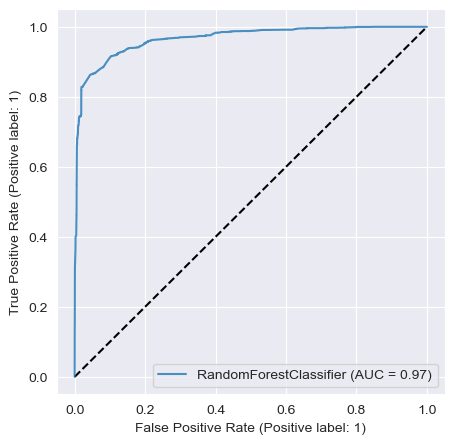

In [96]:
plt.figure(figsize=(5,5))
ax = plt.gca()
plt.plot([0, 1], [0, 1], 'k--')
xgb_disp = RocCurveDisplay.from_estimator(rf_best, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

#### XG Boost

In [97]:
xgb_ada_grid=XGBClassifier()

hyper_params = {'max_depth': range(3, 6),
                'max_features': range(5, 8),
                'n_estimators': range(10, 51, 10)}

In [98]:
grid_xgb = GridSearchCV(estimator=xgb_ada_grid, 
                              param_grid=hyper_params,
                              verbose=1,
                              cv=4,
                              return_train_score=True,
                              n_jobs=-1, scoring='recall')

In [99]:
%%time
grid_xgb.fit(X_ada, y_ada)

Fitting 4 folds for each of 45 candidates, totalling 180 fits
[16:51:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

CPU times: total: 6min 5s
Wall time: 29min 25s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 6), 'max_features': range(5, 8),
                         'n_estimators': range(10, 51, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [100]:
xgb_best = grid_xgb.best_estimator_

In [101]:
xgb_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_features=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [102]:
evaluate_model(xgb_best, X_smt, y_smt, X_test, y_test)

Train confusion matrix 
 [[1188935  100984]
 [  69270 1220649]]
Train accuracy 0.9340059337059149
Recall 0.9462989536552295
F1 score:  0.9348073482741297
--------------------------------------------------
Test confusion matrix 
 [[509504  43320]
 [   284   2611]]
Test accuracy 0.9215358841428851
Recall 0.9018998272884283
F1 score:  0.10695121451685578


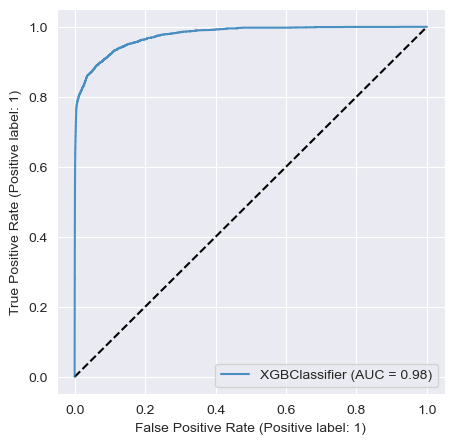

In [103]:
plt.figure(figsize=(5,5))
ax = plt.gca()
plt.plot([0, 1], [0, 1], 'k--')
xgb_disp = RocCurveDisplay.from_estimator(xgb_best, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### Cost Benefit Analysis

In [104]:
combined = pd.concat([df_train, df_test]) # Forming a consolidated dataset

In [105]:
fraud_df=combined[combined['is_fraud']==1]
fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [106]:
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
fraud_df['year']=fraud_df['trans_date_trans_time'].dt.year
fraud_df['month']=fraud_df['trans_date_trans_time'].dt.month_name(locale = 'English')

In [107]:
fraud_monthly=fraud_df.groupby(['year','month'])['amt'].count()
fraud_monthly

year  month    
2019  April        376
      August       382
      December     592
      February     517
      January      506
      July         331
      June         354
      March        494
      May          408
      November     388
      October      454
      September    418
2020  April        302
      August       415
      December     258
      February     336
      January      343
      July         321
      June         467
      March        444
      May          527
      November     294
      October      384
      September    340
Name: amt, dtype: int64

In [108]:
# Average monthly fraud transactions
frauds_per_month=fraud_monthly.sum()/24
frauds_per_month

402.125

In [109]:
# Average amount per fraud
avg_fraud_amt=fraud_df['amt'].mean()
avg_fraud_amt

530.661412288882

In [110]:
# Cost incured before model deployment
cost_before = frauds_per_month*avg_fraud_amt
cost_before

213392.2204166667

In [111]:
# Let TF be the average number of transactions detected as fraudulent by model xgb_best
# TF = (TP + FP)/24
TF = (33162 + 2595)/24

# Cost of providing customer executive support per fraudulent transaction detected by the model is 1.5$
# Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)
customer_support_cost = TF*1.5

# Average number of transactions per month that are fraudulent but not detected by the model (FN)
FN = 300/12

# Total cost incurred due to fraudulent transactions left undetected by the model
fraud_undetected_cost=FN*avg_fraud_amt

In [112]:
cost_after = customer_support_cost + fraud_undetected_cost

In [113]:
Savings = cost_before - cost_after
Savings

197890.87260944466

### THANK YOU